In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Data Cleaning

In [2]:
#Reading csv and datacleanup
df = pd.read_csv("exoplanet_data.csv")
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
df.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,FALSE POSITIVE,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,CONFIRMED,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,CONFIRMED,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


In [3]:
# Set features to be used as x values.
target = df['koi_disposition']
data = df.drop('koi_disposition', axis=1)
features = data.columns

In [4]:
#create train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=1)

In [5]:
from sklearn.preprocessing import MinMaxScaler

# Scale your data
X_scaler = MinMaxScaler().fit(X_train)

#Transformation
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# KNN

In [6]:
from sklearn.neighbors import KNeighborsClassifier

k: 1, Train/Test Score: 1.000/0.787
k: 3, Train/Test Score: 0.895/0.805
k: 5, Train/Test Score: 0.871/0.811
k: 7, Train/Test Score: 0.862/0.818
k: 9, Train/Test Score: 0.858/0.820
k: 11, Train/Test Score: 0.848/0.830
k: 13, Train/Test Score: 0.848/0.830
k: 15, Train/Test Score: 0.842/0.830
k: 17, Train/Test Score: 0.839/0.830
k: 19, Train/Test Score: 0.836/0.831


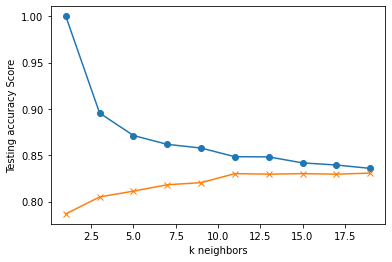

In [7]:
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
        
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [8]:
#Attempting to select best k value
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train_scaled, y_train)
print('k=15 Test Acc: %.3f' % knn.score(X_test_scaled, y_test))

k=15 Test Acc: 0.830


# GridSearch

In [9]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_neighbors': [i for i in range(1, 20, 2)]
}

grid = GridSearchCV(knn, param_grid, verbose=3)

grid.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END ..................................n_neighbors=1; total time=   0.1s
[CV 2/5] END ..................................n_neighbors=1; total time=   0.1s
[CV 3/5] END ..................................n_neighbors=1; total time=   0.1s
[CV 4/5] END ..................................n_neighbors=1; total time=   0.1s
[CV 5/5] END ..................................n_neighbors=1; total time=   0.1s
[CV 1/5] END ..................................n_neighbors=3; total time=   0.1s
[CV 2/5] END ..................................n_neighbors=3; total time=   0.1s
[CV 3/5] END ..................................n_neighbors=3; total time=   0.1s
[CV 4/5] END ..................................n_neighbors=3; total time=   0.1s
[CV 5/5] END ..................................n_neighbors=3; total time=   0.1s
[CV 1/5] END ..................................n_neighbors=5; total time=   0.1s
[CV 2/5] END ..................................n

GridSearchCV(estimator=KNeighborsClassifier(n_neighbors=15),
             param_grid={'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19]},
             verbose=3)

In [10]:
print(grid.best_params_)

{'n_neighbors': 17}


In [11]:
print(grid.best_score_)

0.8170877025738799
